# Projeto prático utilizando data mining

Para este projeto foi utilizada uma base de dados de avaliações de produtos de uma loja de roupas para executar um exercício de Data Mining, focando em análise de sentimentos e extração de palavras-chave.

## importação e visualização dos dados

In [31]:
# importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [32]:
# carregando base de dados
data = pd.read_csv('amostra_avaliacao_loja.csv')

In [33]:
# exibindo dados
data

,ID,ID da Roupa,Idade,Título,Texto da Avaliação,Avaliação,Indicação de Recomendação,Contagem de Feedbacks Positivos,Nome da Divisão,Nome do Departamento,Nome da Classe
0,0,767,33,NaN,"Absolutamente maravilhoso - sedoso, sexy e con...",4,1,0,Íntimos,Íntima,Íntimos
1,1,1080,34,NaN,Amei esse vestido! é tão lindo. aconteceu de e...,5,1,4,Geral,Vestidos,Vestidos
2,2,1077,60,Algumas falhas importantes de design,Eu tinha grandes esperanças neste vestido e re...,3,0,0,Geral,Vestidos,Vestidos
3,3,1049,50,Minha compra favorita!,"Eu amo, amo, amo esse macacão. é divertido, se...",5,1,0,Geral Petite,Partes de Baixo,Calças
4,4,847,47,Camisa lisonjeira,Esta camisa agrada a todos devido ao laço fron...,5,1,6,Geral,Partes de Cima,Blusas
...,...,...,...,...,...,...,...,...,...,...,...
95,95,863,83,Elegância casual!,Comprei este top online e quando o recebi fiqu...,5,1,14,Geral,Partes de Cima,Tricôs
96,96,845,44,NaN,Normalmente uso uma média e comprei uma pequen...,1,0,0,Geral Petite,Partes de Cima,Blusas
97,97,861,44,Enorme,Fiquei muito animado para encomendar este top ...,1,0,0,Geral Petite,Partes de Cima,Tricôs
98,98,1133,50,NaN,NaN,5,1,0,Geral,Jaquetas,Roupas Externas


## exploração e limpeza dos dados

In [35]:
# removendo entradas sem informação
data.dropna(subset=['Texto da Avaliação'], inplace=True)

In [36]:
# convertendo texto para strings
data['Texto da Avaliação'] = data['Texto da Avaliação'].astype(str)

## análise de frequência de palavras

In [40]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [45]:
# concatenando todas as avaliações
avaliacoes = ''.join(data['Texto da Avaliação'].tolist())

In [46]:
# tokenizando e contando a frequência das palavras
palavras = Counter(avaliacoes.split())

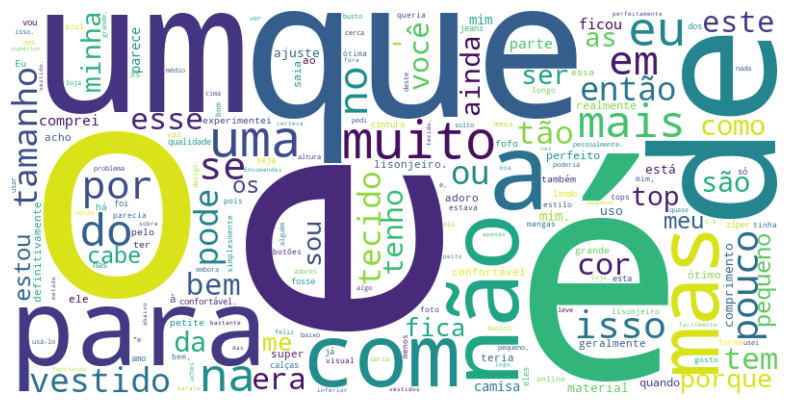

In [47]:
# gerando uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palavras)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## identificação de adjetivos

In [61]:
pln = spacy.load('pt_core_news_sm')

In [62]:
# processando o texco com spacy
doc = pln(avaliacoes.lower())

In [64]:
# extraindo adjetivos
adjetivos = [token.text for token in doc if token.pos_=='ADJ']

In [65]:
# contando a frequência dos adjetivos
adj_count = Counter(adjetivos)

In [66]:
# criando um dataframe com os adjetivos mais frequentes
adj_df = pd.DataFrame(adj_count.items(), columns=['Adjetivo', 'Frequência']).sort_values(by='Frequência', ascending=False)
print(adj_df.head(10))

        Adjetivo  Frequência
12   confortável          22
4        pequeno          20
17        grande          18
10         ótimo          11
22      perfeito          11
127         fofo           9
79           bom           8
13      inferior           8
98         único           8
136        ótima           7


# visualização dos resultados

In [68]:
# criando uma nuvem dos adjetivos mais frequentes
frequency_dict = dict(zip(adj_df['Adjetivo'], adj_df['Frequência']))

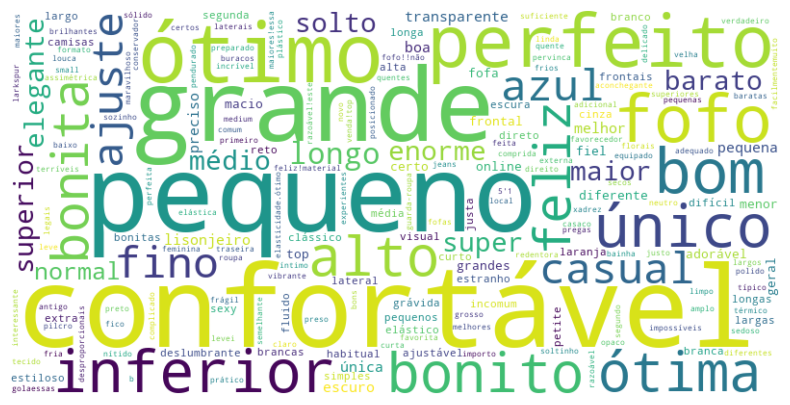

In [69]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequency_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()